<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220830_Currency_Exchange_Rate_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/05/22/currency-exchange-rate-prediction-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 669 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import pandas as pd
import numpy as np

import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression

from datetime import date, timedelta
import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
sns.set()
plt.style.use('seaborn-whitegrid')

In [4]:
end_date = date.today().strftime('%Y-%m-%d')
end_date


'2022-08-30'

In [5]:
start_date = date.today() - timedelta(360*5)
start_date = start_date.strftime('%Y-%m-%d')
start_date

'2017-09-25'

In [14]:
data = yf.download('USDMXN=X', start=start_date, end=end_date, progress=True)

[*********************100%***********************]  1 of 1 completed


In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-25,17.748831,17.932631,17.736700,17.906601,17.906601,0
2017-09-26,17.915911,18.038931,17.871300,17.948400,17.948400,0
2017-09-27,17.961590,18.242350,17.918400,18.221100,18.221100,0
2017-09-28,18.232809,18.293671,18.123600,18.144899,18.144899,0
2017-09-29,18.145550,18.256100,18.092051,18.126400,18.126400,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1285 entries, 2017-09-25 to 2022-08-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1285 non-null   float64
 1   High       1285 non-null   float64
 2   Low        1285 non-null   float64
 3   Close      1285 non-null   float64
 4   Adj Close  1285 non-null   float64
 5   Volume     1285 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 70.3 KB


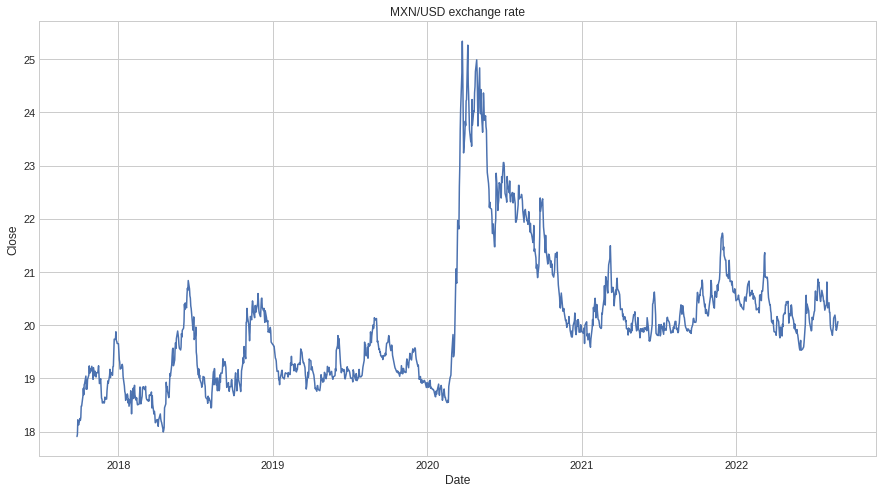

In [18]:
plt.figure(figsize=(15,8))
plt.title('MXN/USD exchange rate')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(data['Close'])
plt.show()

In [19]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.0
mean,20.026708,20.138664,19.926280,20.026009,20.026009,0.0
std,1.257370,1.298228,1.217810,1.257564,1.257564,0.0
min,17.748831,17.932631,17.736700,17.906601,17.906601,0.0
25%,19.105850,19.182131,19.028999,19.101480,19.101480,0.0
50%,19.888100,19.963400,19.808100,19.888100,19.888100,0.0
75%,20.464540,20.577351,20.356199,20.464300,20.464300,0.0
max,25.315100,25.765341,24.728029,25.336201,25.336201,0.0


In [20]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.995738,0.997575,0.999497,0.999497,NaN
High,0.995738,1.000000,0.995781,0.995707,0.995707,NaN
Low,0.997575,0.995781,1.000000,0.997523,0.997523,NaN
Close,0.999497,0.995707,0.997523,1.000000,1.000000,NaN
Adj Close,0.999497,0.995707,0.997523,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


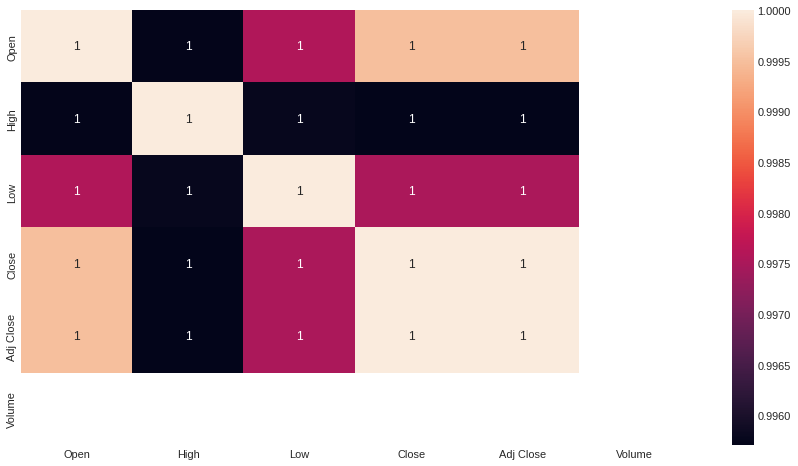

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [22]:
x = np.array(data[['Open', 'High', 'Low']])
y = np.array(data['Close'])

In [23]:
y.shape

(1285,)

In [24]:
y = y.reshape(-1,1)
y.shape

(1285, 1)

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1028, 3), (257, 3), (1028, 1), (257, 1))

In [27]:
model = DecisionTreeRegressor()

In [28]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [29]:
ypred = model.predict(xtest)

In [30]:
ypred

array([19.92779922, 19.14679909, 21.67449951, 17.99189949, 18.66379929,
       18.75569916, 19.21817017, 19.52503967, 20.10275078, 19.73027992,
       18.81690025, 19.86070061, 19.09309959, 22.49246979, 19.92259026,
       20.95070076, 18.67394066, 20.19580078, 19.69560051, 19.92749977,
       20.23340034, 20.27420044, 19.09690094, 22.47820091, 19.10309982,
       20.10294914, 20.46430016, 20.78030014, 18.90797043, 20.68281937,
       20.27948952, 20.14443016, 19.95359993, 19.92749977, 18.88134003,
       21.59420013, 21.38699913, 19.89089966, 20.1051693 , 18.53503036,
       19.03420067, 20.19580078, 20.1303196 , 20.31509972, 19.00749969,
       18.85930061, 20.95420074, 19.13059998, 18.52009964, 19.13699913,
       20.39788055, 20.19389915, 19.21610069, 19.57670021, 18.98279953,
       19.36384964, 20.81259918, 19.54521942, 19.90094948, 20.54590034,
       20.83959961, 18.38051987, 19.99069977, 20.38349915, 19.55550003,
       24.36327934, 19.96235085, 18.99539948, 21.97249985, 19.49

In [31]:
from sklearn import metrics

In [32]:
metrics.r2_score(ytest, ypred)

0.9978151608572027